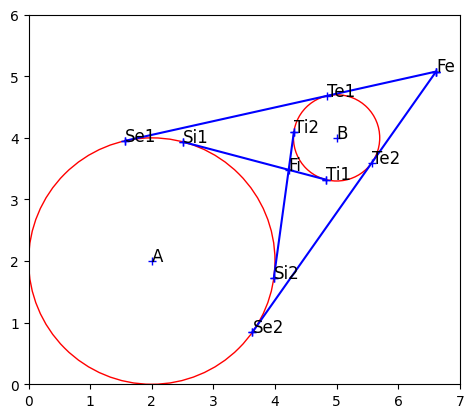

In [ ]:

import math
from geom_types import Point,Circle


# rA > rB and B not inside A
A=Circle(Point(2,2),2)
B=Circle(Point(5,4),0.7)
#B=Circle(Point(3.5,3.5),1)

# distance from A to B
dAB = math.hypot(B.ctr.x - A.ctr.x, B.ctr.y - A.ctr.y)
# angle between X axe and AB
aAB = math.atan2(B.ctr.y - A.ctr.y, B.ctr.x - A.ctr.x)

#------------------------------------------------------------------
# compute external tangents
#------------------------------------------------------------------
dAFe = dAB / ( 1 - B.r / A.r )
Fe = Point(
    A.ctr.x + dAFe * ( B.ctr.x - A.ctr.x ) / dAB,
    A.ctr.y + dAFe * ( B.ctr.y - A.ctr.y ) / dAB
)

thetaAe = math.acos( A.r / dAFe )
thetaBe = math.acos( B.r / ( dAFe - dAB ) )

Se1 = Point(
    A.ctr.x + A.r * math.cos( aAB + thetaAe ),
    A.ctr.y + A.r * math.sin( aAB + thetaAe )
)
Se2 = Point(
    A.ctr.x + A.r * math.cos( aAB - thetaAe ),
    A.ctr.y + A.r * math.sin( aAB - thetaAe )
)
Te1 = Point(
    B.ctr.x + B.r * math.cos( aAB + thetaBe ),
    B.ctr.y + B.r * math.sin( aAB + thetaBe )
)
Te2 = Point(
    B.ctr.x + B.r * math.cos( aAB - thetaBe ),
    B.ctr.y + B.r * math.sin( aAB - thetaBe )
)

#------------------------------------------------------------------
# compute internal tangents (if exists)
#------------------------------------------------------------------
Fi = None
Si1 = None
Si2 = None
Ti1 = None
Ti2 = None
if dAB > A.r + B.r:
    dAFi = dAB / ( 1 + B.r / A.r )
    Fi = Point(
        A.ctr.x + dAFi * ( B.ctr.x - A.ctr.x ) / dAB,
        A.ctr.y + dAFi * ( B.ctr.y - A.ctr.y ) / dAB
    )
    
    thetaAi = math.acos( A.r / dAFi )
    thetaBi = math.acos( B.r / ( dAB - dAFi ) )
    
    Si1 = Point(
        A.ctr.x + A.r * math.cos( aAB + thetaAi ),
        A.ctr.y + A.r * math.sin( aAB + thetaAi )
    )
    Si2 = Point(
        A.ctr.x + A.r * math.cos( aAB - thetaAi ),
        A.ctr.y + A.r * math.sin( aAB - thetaAi )
    )
    Ti1 = Point(
        B.ctr.x + B.r * math.cos( aAB + math.pi + thetaBi ),
        B.ctr.y + B.r * math.sin( aAB + math.pi + thetaBi )
    )
    Ti2 = Point(
        B.ctr.x + B.r * math.cos( aAB + math.pi - thetaBi ),
        B.ctr.y + B.r * math.sin( aAB + math.pi - thetaBi )
    )


#------------------------------------------------------------------
# plot circles and tangents
#------------------------------------------------------------------

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlim(0.0, 7.0)
ax.set_ylim(0.0, 6.0)
ax.axis('scaled')

plt.plot(A.ctr.x, A.ctr.y, marker="+", color='b')
plt.text(A.ctr.y, A.ctr.y, "A", fontsize=12)
ax.add_patch(plt.Circle(A.ctr, A.r, color='r', fill=False))

plt.plot(B.ctr.x, B.ctr.y, marker="+", color='b')
plt.text(B.ctr.x, B.ctr.y, "B", fontsize=12)
ax.add_patch(plt.Circle(B.ctr, B.r, color='r', fill=False))

# plot external tangents
plt.plot(Fe.x, Fe.y, marker="+", color='b')
plt.text(Fe.x, Fe.y, "Fe", fontsize=12)

plt.plot(Se1.x, Se1.y, marker="+", color='b')
plt.text(Se1.x, Se1.y, "Se1", fontsize=12)
plt.plot(Te1.x, Te1.y, marker="+", color='b')
plt.text(Te1.x, Te1.y, "Te1", fontsize=12)
plt.plot([Se1[0], Fe[0]], [Se1[1], Fe[1]], marker="+", color='b')

plt.plot(Se2.x, Se2.y, marker="+", color='b')
plt.text(Se2.x, Se2.y, "Se2", fontsize=12)
plt.plot(Te2.x, Te2.y, marker="+", color='b')
plt.text(Te2.x, Te2.y, "Te2", fontsize=12)
plt.plot([Se2[0], Fe[0]], [Se2[1], Fe[1]], marker="+", color='b')


if Fi is not None:
    plt.plot(Fi.x, Fi.y, marker="+", color='b')
    plt.text(Fi.x, Fi.y, "Fi", fontsize=12)

    plt.plot(Si1.x, Si1.y, marker="+", color='b')
    plt.text(Si1.x, Si1.y, "Si1", fontsize=12)
    plt.plot(Ti1.x, Ti1.y, marker="+", color='b')
    plt.text(Ti1.x, Ti1.y, "Ti1", fontsize=12)
    plt.plot([Si1[0], Ti1[0]], [Si1[1], Ti1[1]], marker="+", color='b')

    plt.plot(Si2.x, Si2.y, marker="+", color='b')
    plt.text(Si2.x, Si2.y, "Si2", fontsize=12)
    plt.plot(Ti2.x, Ti2.y, marker="+", color='b')
    plt.text(Ti2.x, Ti2.y, "Ti2", fontsize=12)
    plt.plot([Si2[0], Ti2[0]], [Si2[1], Ti2[1]], marker="+", color='b')

plt.show()